**Exploratory Data Analysis - Sports - Shreemann Mishra**

IMPORTING NECESSARY LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

UPLOADING DATA 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches.csv


In [30]:
import io 
data1 = pd.read_csv(io.BytesIO(uploaded['matches.csv']))
print(data1)

        id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]


In [31]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
from google.colab import files
uploaded2 = files.upload()

Saving deliveries.csv to deliveries.csv


In [32]:
import io 
data2 = pd.read_csv(io.BytesIO(uploaded2['deliveries.csv']))
print(data2)

        match_id  inning  ... dismissal_kind    fielder
0              1       1  ...            NaN        NaN
1              1       1  ...            NaN        NaN
2              1       1  ...            NaN        NaN
3              1       1  ...            NaN        NaN
4              1       1  ...            NaN        NaN
...          ...     ...  ...            ...        ...
179073     11415       2  ...            NaN        NaN
179074     11415       2  ...            NaN        NaN
179075     11415       2  ...        run out  KH Pandya
179076     11415       2  ...            NaN        NaN
179077     11415       2  ...            lbw        NaN

[179078 rows x 21 columns]


In [33]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


CHECKING FOR NULL VALUES

In [34]:
numvar = data1.columns[data1.dtypes != 'object']
catvar = data1.columns[data1.dtypes == 'objects']
print(numvar)
print(catvar)

Index(['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets'], dtype='object')
Index([], dtype='object')


In [35]:
numvar.isnull()

array([False, False, False, False, False])

In [36]:
catvar.isnull().sum()

0

**HENCE THERE ARE NO MISSING VALUES**

ANALYSIS OF PLAYER OF MATCH

In [37]:
data1['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
RG Sharma          17
MS Dhoni           17
DA Warner          17
                   ..
AP Tare             1
J Archer            1
Z Khan              1
MJ Lumb             1
KMDN Kulasekara     1
Name: player_of_match, Length: 226, dtype: int64

In [38]:
data1['player_of_match'].value_counts()[0:10].keys()

Index(['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'V Kohli'],
      dtype='object')

PLOTTING A BAR GRAPH FOR PLAYER OF THE MATCH

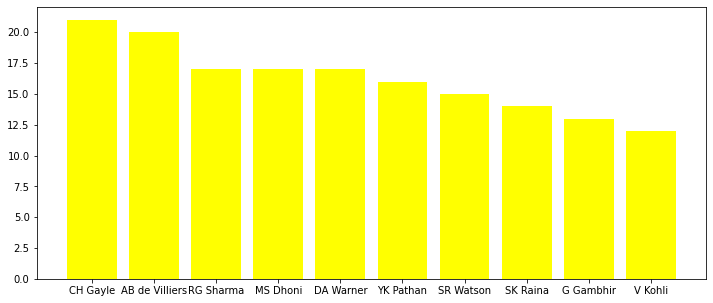

In [40]:
plt.figure(figsize=(12,5))
plt.bar(list(data1['player_of_match'].value_counts()[0:10].keys()), data1['player_of_match'].value_counts()[0:10], color = 'yellow')
plt.xticks(color = "black")
plt.yticks(color= "black")
plt.show()

In [41]:
data1['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

ANALYSIS OF WHO WON TOSS

In [42]:
data1['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [43]:
data1['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

FINDING MATHCHES WHERE MATCH WAS WON BY THE TEAM WHO PLAYED FIRST INNINGS

In [44]:
batting_first = data1[data1['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


PLOTTING HISTOGRAM FOR TEAMS WHO PLAYED IN THE FIRST INNINGS AND WON 

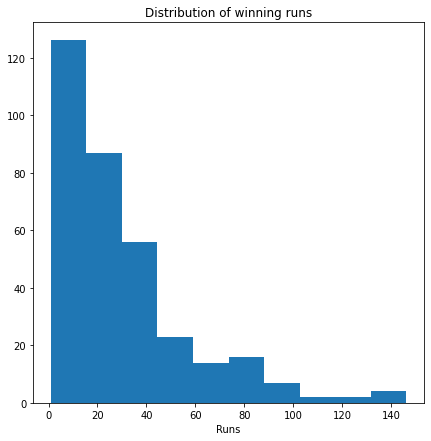

In [45]:
#making histogram for numerical column
plt.figure(figsize = (7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of winning runs")
plt.xlabel('Runs')
plt.show()

FINDING WHICH TEAM DID GOOD WHEN BATTING FIRST

In [46]:
batting_first['winner'].value_counts()
bat1 = batting_first['winner'].value_counts().tolist()


PLOTTING BAR GRAPH FOR THE ABOVE

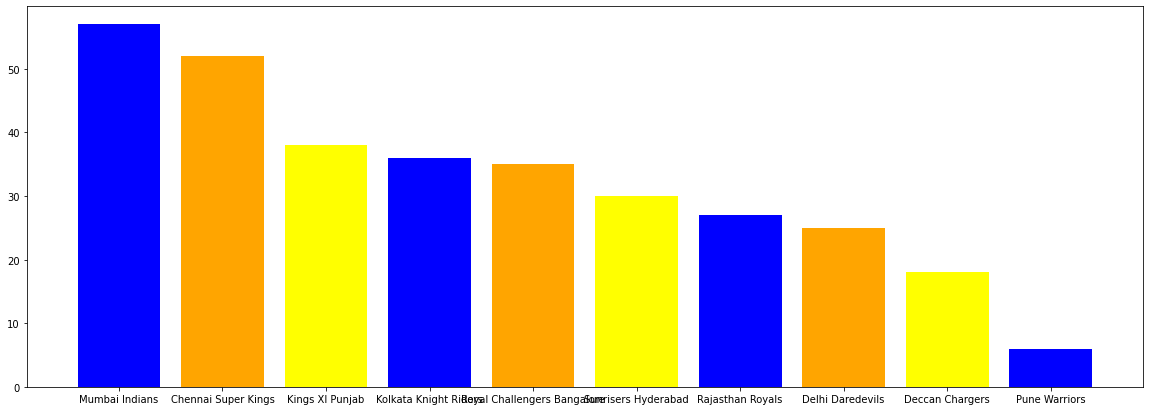

In [47]:
#bar plot is for categorical data, first parameter is categorical
plt.figure(figsize=(20,7))
plt.bar(list(batting_first['winner'].value_counts()[0:10].keys()), list(batting_first['winner'].value_counts()[0:10]),color = ['blue','orange','yellow'])
plt.xticks(color = 'black')
plt.show()

PIE CHART

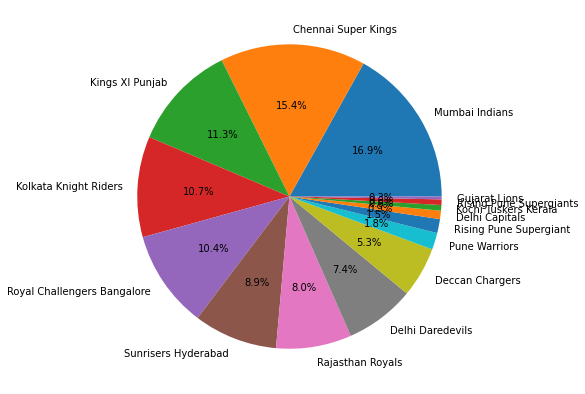

In [48]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()), labels = list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

ANALYSIS OF TEAMS WHO WON AFTER BATTING SECOND

In [49]:
batting_second = data1[data1['win_by_wickets'] != 0]
batting_second.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


PLOTTING HISTOGRAM FOR FREQUENCY OF WINS WITH RESPECT TO WICKETS

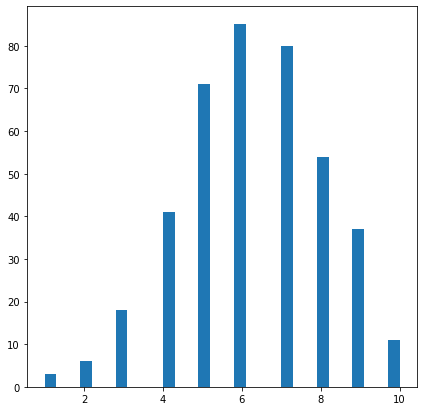

In [50]:
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'], bins = 30)
plt.show()

FREQUENCY OF NUMBER OF WINS AFTER BATTING SECOND WITH RESPECT TO WICKETS

In [51]:
bat2 = batting_second['winner'].value_counts().tolist()

PLOTTING BAR GRAPH

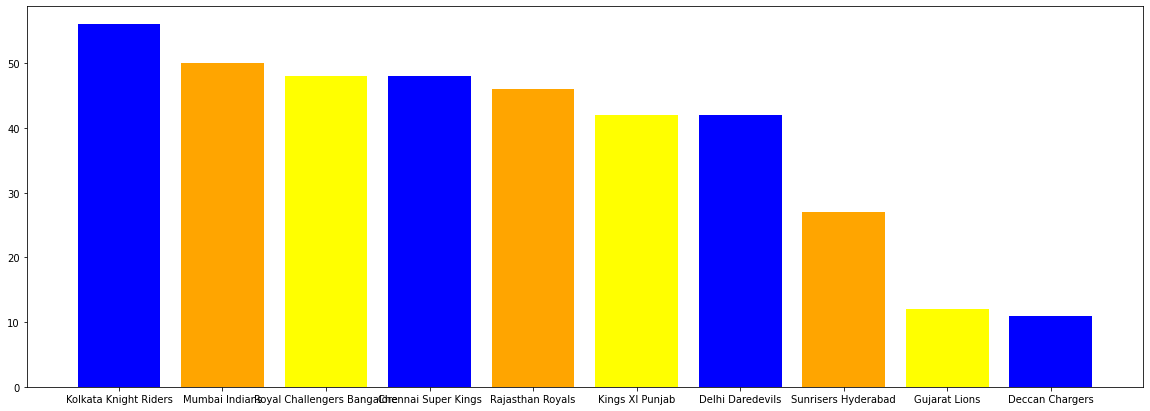

In [52]:
plt.figure(figsize=(20,7))
plt.bar(list(batting_second['winner'].value_counts()[0:10].keys()), list(batting_second['winner'].value_counts()[0:10]),color = ['blue','orange','yellow'])
plt.xticks(color = 'black')
plt.show()


PIE CHART

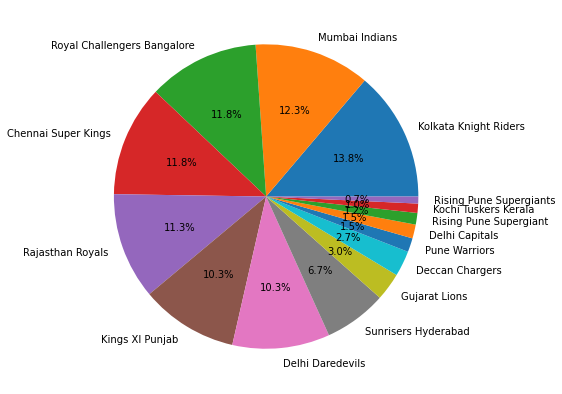

In [53]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()), labels = list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

# **LOOKING AT THE ANALYSIS WE CAN SAY THAT TEAMS WHO BATTED SECOND HAD BETTER PERFORMANCE THAT TEAMS BATTING FIRST**